In [1]:
import numpy as np

In [21]:
class Linear_Regression():
    def __init__(self,learning_rate,no_iterations):
        self.learning_rate=learning_rate
        self.no_iterations=no_iterations
    def fit(self,X,Y):
        self.m,self.n=X.shape
        #initiliating weights and bias
        self.w=np.zeros(self.n)
        self.b=0
        self.X=X
        self.Y=Y
        #implementing gradient descent
        for i in range(self.no_iterations):
            self.update_weights()
    def update_weights(self):
        Y_prediction=self.predict(self.X)
        #calculate gradients
        dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
        db=-2*np.sum(self.Y-Y_prediction)/self.m
        #updating the weights
        self.w=self.w-self.learning_rate*dw
        self.b=self.b-self.learning_rate*db
    def predict(self,X):
        return X.dot(self.w)+self.b
    

In [12]:
#using linear Reegression for predictin
#importing the dependecies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
#data preprocessing
#loading the data to csv to pandas
salary=pd.read_csv("C:/Users/chand/Downloads/salary_data.csv")

In [15]:
print(salary.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [16]:
salary.shape

(30, 2)

In [17]:
#counting the misssing values
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [18]:
#splliting the feature and the target
x=salary.iloc[:,:-1].values
y=salary.iloc[:,1].values

In [19]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [20]:
#splitting the data into traing and split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [22]:
#traing the linear rgression 
model=Linear_Regression(learning_rate=0.02,no_iterations=1000)

In [23]:
model.fit(x_train,y_train)

In [24]:
print("weight=",model.w[0])
print("bias=",model.b)

weight= 9514.400999035135
bias= 23697.406507136307


In [25]:
#predicting the salary for test data
test_data_predict=model.predict(x_test)

In [27]:
print(test_data_predict)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Text(0.5, 1.0, 'salary vs work ex')

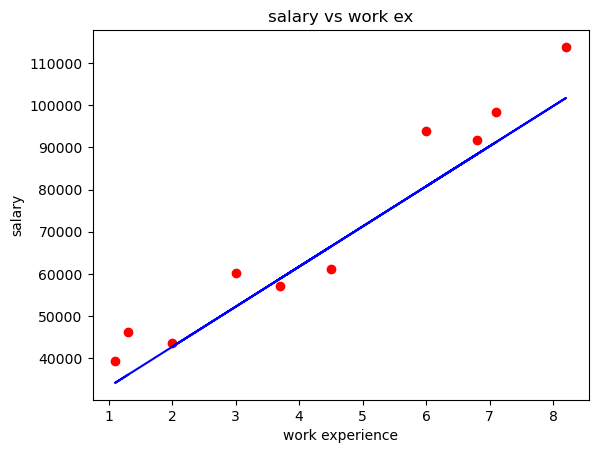

In [29]:
#visualization
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_predict,color='blue')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('salary vs work ex')